## Step-1 Import Libraries

In [1]:
pip install alpha-vantage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# import libraries

import numpy as np
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import matplotlib.dates as matdate

## Step-2 Load dataset into pandas dataframes 

### 1. confirm_case_df for confirm url
### 2. death_case_df for death url

In [3]:
confirm_case_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_case_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [4]:
confirm_case_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,205541,205612,205612,205802,205830,205907,206073,206133,206145,206206
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333316,333322,333330,333330,333338,333343,333360,333381,333391,333408
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271057,271061,271061,271079,271082,271090,271096,271100,271102,271107
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,46824,46824,46824,46824,46824,47219,47219,47219,47219,47219
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104491,104491,104491,104491,104491,104676,104676,104676,104676,104676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333721,333721,333721,333721,333746,333746,333746,333746,333746,333746


In [5]:
death_case_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7833,7834,7834,7834,7834
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,156,156,156,156,156,157,157,157,157,157
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1923,1923,1923,1923,1923,1924,1924,1924,1924,1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019


## Step-3	Use pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level

First let's remove all the unnecessary columns from both confirm and death dataframe such as Province/State, Lat, and Long

In [6]:
confirm_case_df.drop(columns=['Province/State','Lat','Long'], inplace=True)
death_case_df.drop(columns=['Province/State','Lat','Long'],inplace=True)

In [7]:
confirm_case_df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,205541,205612,205612,205802,205830,205907,206073,206133,206145,206206
1,Albania,0,0,0,0,0,0,0,0,0,...,333316,333322,333330,333330,333338,333343,333360,333381,333391,333408
2,Algeria,0,0,0,0,0,0,0,0,0,...,271057,271061,271061,271079,271082,271090,271096,271100,271102,271107
3,Andorra,0,0,0,0,0,0,0,0,0,...,46824,46824,46824,46824,46824,47219,47219,47219,47219,47219
4,Angola,0,0,0,0,0,0,0,0,0,...,104491,104491,104491,104491,104491,104676,104676,104676,104676,104676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
285,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,Yemen,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,Zambia,0,0,0,0,0,0,0,0,0,...,333721,333721,333721,333721,333746,333746,333746,333746,333746,333746


In [8]:
death_case_df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7833,7834,7834,7834,7834
1,Albania,0,0,0,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,Algeria,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,0,0,0,0,0,0,0,0,0,...,156,156,156,156,156,157,157,157,157,157
4,Angola,0,0,0,0,0,0,0,0,0,...,1923,1923,1923,1923,1923,1924,1924,1924,1924,1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,Yemen,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,Zambia,0,0,0,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019


There might some records for the same coutry having in same dataframe so let's first perform groupby on country/region column and sum up the cases if so.

In [9]:
confirmed_df = confirm_case_df.groupby(['Country/Region']).sum()
death_df = death_case_df.groupby(['Country/Region']).sum()

In [10]:
confirmed_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,205541,205612,205612,205802,205830,205907,206073,206133,206145,206206
Albania,0,0,0,0,0,0,0,0,0,0,...,333316,333322,333330,333330,333338,333343,333360,333381,333391,333408
Algeria,0,0,0,0,0,0,0,0,0,0,...,271057,271061,271061,271079,271082,271090,271096,271100,271102,271107
Andorra,0,0,0,0,0,0,0,0,0,0,...,46824,46824,46824,46824,46824,47219,47219,47219,47219,47219
Angola,0,0,0,0,0,0,0,0,0,0,...,104491,104491,104491,104491,104491,104676,104676,104676,104676,104676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


In [11]:
death_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7833,7834,7834,7834,7834
Albania,0,0,0,0,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
Algeria,0,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
Andorra,0,0,0,0,0,0,0,0,0,0,...,156,156,156,156,156,157,157,157,157,157
Angola,0,0,0,0,0,0,0,0,0,0,...,1923,1923,1923,1923,1923,1924,1924,1924,1924,1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159


Sum all the cases for the country. For that let's apply sum() on axis=1.

In [12]:
covid_positive = confirmed_df.sum(axis=1).reset_index()
covid_positive.rename(columns={'Country/Region':'Country',0:'Confirmed_cases'},inplace=True)
covid_positive

,Country,Confirmed_cases
0,Afghanistan,110214917
1,Albania,153830108
2,Algeria,156966802
3,Andorra,20010202
4,Angola,50040541
...,...,...
196,West Bank and Gaza,345738380
197,Winter Olympics 2022,163637
198,Yemen,6744660
199,Zambia,163803740


In [13]:
covid_negative = death_df.sum(axis=1).reset_index()
covid_negative.rename(columns={'Country/Region':'Country',0:'Total_death'},inplace=True)
covid_negative

,Country,Total_death
0,Afghanistan,4673864
1,Albania,2143775
2,Algeria,4247580
3,Andorra,111622
4,Angola,1048488
...,...,...
196,West Bank and Gaza,3212449
197,Winter Olympics 2022,0
198,Yemen,1310341
199,Zambia,2248142


Merge the above two saperate dataframes into one

In [14]:
global_level_df = pd.merge(covid_positive,covid_negative,on='Country')

In [15]:
global_level_df

,Country,Confirmed_cases,Total_death
0,Afghanistan,110214917,4673864
1,Albania,153830108,2143775
2,Algeria,156966802,4247580
3,Andorra,20010202,111622
4,Angola,50040541,1048488
...,...,...,...
196,West Bank and Gaza,345738380,3212449
197,Winter Olympics 2022,163637,0
198,Yemen,6744660,1310341
199,Zambia,163803740,2248142



## Step-4 Stock reasearch

In [16]:
k = 'NV1T7B89DEYLSJ4T'
ts = TimeSeries(key=k,output_format='pandas')
american = ts.get_daily_adjusted('NASDX', outputsize='full')
canadian = ts.get_daily_adjusted('TSX:AC', outputsize='full')
travel = ts.get_daily_adjusted('AC', outputsize='full')
real_estate = ts.get_daily_adjusted('PLD', outputsize='full')
precious_metal = ts.get_daily_adjusted('CIGI', outputsize='full')

In [17]:
american[0]

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2022-12-02,25.90,25.90,25.90,25.90,25.900000,0.0,0.0000,1.0
2022-12-01,26.01,26.01,26.01,26.01,26.010000,0.0,0.0000,1.0
2022-11-30,25.97,25.97,25.97,25.97,25.970000,0.0,0.7655,1.0
2022-11-29,25.57,25.57,25.57,25.57,24.837906,0.0,0.0000,1.0
2022-11-28,25.75,25.75,25.75,25.75,25.012753,0.0,0.0000,1.0
...,...,...,...,...,...,...,...,...
2000-01-24,9.74,9.74,9.74,9.74,7.623707,0.0,0.0000,1.0
2000-01-21,10.07,10.07,10.07,10.07,7.882005,0.0,0.0000,1.0
2000-01-20,10.06,10.06,10.06,10.06,7.874178,0.0,0.0000,1.0


In [18]:
usa_df = pd.DataFrame(american[0])
cnd_df = pd.DataFrame(canadian[0])
travel_df = pd.DataFrame(travel[0])
real_estate_df = pd.DataFrame(real_estate[0])
precious_metal_df = pd.DataFrame(precious_metal[0])

In [19]:
usa_df.reset_index(level=0, inplace=True)
cnd_df.reset_index(level=0, inplace=True)
travel_df.reset_index(level=0, inplace=True)
real_estate_df.reset_index(level=0, inplace=True)
precious_metal_df.reset_index(level=0, inplace=True)

In [20]:
usa_df

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2022-12-02,25.90,25.90,25.90,25.90,25.900000,0.0,0.0000,1.0
1,2022-12-01,26.01,26.01,26.01,26.01,26.010000,0.0,0.0000,1.0
2,2022-11-30,25.97,25.97,25.97,25.97,25.970000,0.0,0.7655,1.0
3,2022-11-29,25.57,25.57,25.57,25.57,24.837906,0.0,0.0000,1.0
4,2022-11-28,25.75,25.75,25.75,25.75,25.012753,0.0,0.0000,1.0
...,...,...,...,...,...,...,...,...,...
5753,2000-01-24,9.74,9.74,9.74,9.74,7.623707,0.0,0.0000,1.0
5754,2000-01-21,10.07,10.07,10.07,10.07,7.882005,0.0,0.0000,1.0
5755,2000-01-20,10.06,10.06,10.06,10.06,7.874178,0.0,0.0000,1.0
5756,2000-01-19,10.00,10.00,10.00,10.00,7.827215,0.0,0.0000,1.0


In [21]:
cnd_df

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2022-12-05,19.02,19.41,18.97,19.27,19.27,2759678.0,0.0,1.0
1,2022-12-02,18.90,19.17,18.81,19.06,19.06,1578100.0,0.0,1.0
2,2022-12-01,19.34,19.36,19.03,19.10,19.10,1716800.0,0.0,1.0
3,2022-11-30,18.99,19.32,18.76,19.29,19.29,2859500.0,0.0,1.0
4,2022-11-29,18.67,19.07,18.63,18.92,18.92,1403000.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
4023,2006-11-23,19.29,19.49,19.01,19.45,19.45,423204.0,0.0,1.0
4024,2006-11-22,17.75,19.13,17.75,19.10,19.10,616310.0,0.0,1.0
4025,2006-11-21,18.75,18.75,17.50,17.86,17.86,1943962.0,0.0,1.0
4026,2006-11-20,19.50,19.50,18.40,18.75,18.75,476380.0,0.0,1.0


In [22]:
travel_df

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2022-12-05,41.65,42.2300,40.67,42.07,42.070000,3321.0,0.0,1.0
1,2022-12-02,40.41,41.6400,40.41,41.64,41.640000,2395.0,0.0,1.0
2,2022-12-01,38.13,40.4500,38.13,40.30,40.300000,3230.0,0.0,1.0
3,2022-11-30,39.45,40.4500,38.00,40.45,40.450000,5414.0,0.1,1.0
4,2022-11-29,40.98,40.9800,38.60,38.60,38.504809,1748.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1761,2015-12-07,33.74,34.7500,33.74,34.48,32.985291,20212.0,0.0,1.0
1762,2015-12-04,33.90,34.4900,33.90,33.99,32.516533,7694.0,0.0,1.0
1763,2015-12-03,36.51,36.5100,33.87,33.91,32.440001,9266.0,0.0,1.0
1764,2015-12-02,33.33,35.5300,33.33,35.21,33.683646,35111.0,0.0,1.0


In [23]:
real_estate_df

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2022-12-05,116.00,116.24,113.735,114.26,114.260000,2840396.0,0.0,1.0
1,2022-12-02,115.56,118.02,114.820,116.94,116.940000,3014114.0,0.0,1.0
2,2022-12-01,119.05,119.49,115.740,117.10,117.100000,2784289.0,0.0,1.0
3,2022-11-30,113.26,117.82,112.490,117.79,117.790000,8839715.0,0.0,1.0
4,2022-11-29,111.60,114.12,111.260,113.81,113.810000,2635129.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
5807,1999-11-05,20.38,20.63,20.380,20.56,6.561282,15000.0,0.0,1.0
5808,1999-11-04,20.63,20.63,20.500,20.50,6.542134,35700.0,0.0,1.0
5809,1999-11-03,20.50,20.63,20.380,20.56,6.561282,33400.0,0.0,1.0
5810,1999-11-02,20.00,20.56,19.750,20.44,6.522986,118400.0,0.0,1.0


In [24]:
precious_metal_df

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2022-12-05,96.400000,96.510000,92.622500,93.180000,93.180000,189754.0,0.0,1.0
1,2022-12-02,95.250000,97.830000,95.040000,96.200000,96.200000,75777.0,0.0,1.0
2,2022-12-01,94.920000,96.950000,92.370000,96.530000,96.530000,85762.0,0.0,1.0
3,2022-11-30,91.585000,94.680000,91.220000,94.670000,94.670000,86327.0,0.0,1.0
4,2022-11-29,92.000000,92.650000,91.160000,91.660000,91.660000,43569.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
5807,1999-11-05,10.937497,11.000013,10.749986,10.749986,3.285095,54000.0,0.0,1.0
5808,1999-11-04,11.125008,11.187490,10.937497,10.937497,3.342396,43900.0,0.0,1.0
5809,1999-11-03,11.375001,11.499998,11.125008,11.125008,3.399698,68000.0,0.0,1.0
5810,1999-11-02,11.375001,11.375001,11.250005,11.375001,3.476093,19800.0,0.0,1.0


## Step-5 Daily high and low prices for the stocks

In [25]:
# FIltering Date, High price, and low price columns and renaming it

usa_df = usa_df[['date','2. high','3. low']].rename(columns={'2. high':'usa_high','3. low':'usa_low'})
cnd_df = cnd_df[['date','2. high','3. low']].rename(columns={'2. high':'cnd_high','3. low':'cnd_low'})
travel_df = travel_df[['date','2. high','3. low']].rename(columns={'2. high':'travel_high','3. low':'travel_low'})
real_estate_df = real_estate_df[['date','2. high','3. low']].rename(columns={'2. high':'real_estate_high','3. low':'real_estate_low'})
precious_metal_df = precious_metal_df[['date','2. high','3. low']].rename(columns={'2. high':'precious_metal_high','3. low':'precious_metal_low'})

In [26]:
print("USA Stock Dataframe")
print(usa_df.head())
print("Canada Stock Dataframe")
print(cnd_df.head())
print("Travel Sector Dataframe")
print(travel_df.head())
print("Real Estate Dataframe")
print(real_estate_df.head())
print("Precious Metal Dataframe")
print(precious_metal_df.head())

USA Stock Dataframe
        date  usa_high  usa_low
0 2022-12-02     25.90    25.90
1 2022-12-01     26.01    26.01
2 2022-11-30     25.97    25.97
3 2022-11-29     25.57    25.57
4 2022-11-28     25.75    25.75
Canada Stock Dataframe
        date  cnd_high  cnd_low
0 2022-12-05     19.41    18.97
1 2022-12-02     19.17    18.81
2 2022-12-01     19.36    19.03
3 2022-11-30     19.32    18.76
4 2022-11-29     19.07    18.63
Travel Sector Dataframe
        date  travel_high  travel_low
0 2022-12-05        42.23       40.67
1 2022-12-02        41.64       40.41
2 2022-12-01        40.45       38.13
3 2022-11-30        40.45       38.00
4 2022-11-29        40.98       38.60
Real Estate Dataframe
        date  real_estate_high  real_estate_low
0 2022-12-05            116.24          113.735
1 2022-12-02            118.02          114.820
2 2022-12-01            119.49          115.740
3 2022-11-30            117.82          112.490
4 2022-11-29            114.12          111.260
Precious Me

### Merging stock dataframes

In [27]:
stock_df = usa_df.merge(cnd_df,on='date').merge(travel_df,on='date').merge(real_estate_df,on='date').merge(precious_metal_df,on='date')
stock_df.head()

,date,usa_high,usa_low,cnd_high,cnd_low,travel_high,travel_low,real_estate_high,real_estate_low,precious_metal_high,precious_metal_low
0,2022-12-02,25.90,25.90,19.17,18.81,41.64,40.41,118.02,114.82,97.83,95.04
1,2022-12-01,26.01,26.01,19.36,19.03,40.45,38.13,119.49,115.74,96.95,92.37
2,2022-11-30,25.97,25.97,19.32,18.76,40.45,38.00,117.82,112.49,94.68,91.22
3,2022-11-29,25.57,25.57,19.07,18.63,40.98,38.60,114.12,111.26,92.65,91.16
4,2022-11-28,25.75,25.75,19.32,18.71,42.00,40.37,116.85,110.92,94.17,91.49


## Step-6: Append that info to the data frame created in step 3

In [28]:
print(confirm_case_df.head())
print(death_case_df.head())

  Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0    Afghanistan        0        0        0        0        0        0   
1        Albania        0        0        0        0        0        0   
2        Algeria        0        0        0        0        0        0   
3        Andorra        0        0        0        0        0        0   
4         Angola        0        0        0        0        0        0   

   1/28/20  1/29/20  1/30/20  ...  11/25/22  11/26/22  11/27/22  11/28/22  \
0        0        0        0  ...    205541    205612    205612    205802   
1        0        0        0  ...    333316    333322    333330    333330   
2        0        0        0  ...    271057    271061    271061    271079   
3        0        0        0  ...     46824     46824     46824     46824   
4        0        0        0  ...    104491    104491    104491    104491   

   11/29/22  11/30/22  12/1/22  12/2/22  12/3/22  12/4/22  
0    205830    205907   206073  

In [29]:
confirmed_df1 = confirmed_df.reset_index()
death_df1 = death_df.reset_index()

In [30]:
confirmed_df1.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,205541,205612,205612,205802,205830,205907,206073,206133,206145,206206
1,Albania,0,0,0,0,0,0,0,0,0,...,333316,333322,333330,333330,333338,333343,333360,333381,333391,333408
2,Algeria,0,0,0,0,0,0,0,0,0,...,271057,271061,271061,271079,271082,271090,271096,271100,271102,271107
3,Andorra,0,0,0,0,0,0,0,0,0,...,46824,46824,46824,46824,46824,47219,47219,47219,47219,47219
4,Angola,0,0,0,0,0,0,0,0,0,...,104491,104491,104491,104491,104491,104676,104676,104676,104676,104676


In [31]:
death_df1.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7833,7834,7834,7834,7834
1,Albania,0,0,0,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,Algeria,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,0,0,0,0,0,0,0,0,0,...,156,156,156,156,156,157,157,157,157,157
4,Angola,0,0,0,0,0,0,0,0,0,...,1923,1923,1923,1923,1923,1924,1924,1924,1924,1924


In [32]:
cnd_cases = confirmed_df1[confirmed_df1['Country/Region']=='Canada']
usa_cases = confirmed_df1[confirmed_df1['Country/Region']=='US']
positive_cases = pd.concat([cnd_cases,usa_cases],ignore_index=True)
positive_cases

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22
0,Canada,0,2,3,3,3,3,4,4,4,...,4428546,4428546,4428546,4430558,4431111,4432426,4444843,4444912,4444912,4444912
1,US,1,1,2,2,5,5,5,6,6,...,98566341,98569058,98573468,98633140,98697622,98807782,98924207,98962019,98967906,98972375


In [33]:
positive_cases = positive_cases.transpose().reset_index().rename(columns={'index':'date',0:'cnd_positive_cases',1:'usa_positive_cases'})
positive_cases

,date,cnd_positive_cases,usa_positive_cases
0,Country/Region,Canada,US
1,1/22/20,0,1
2,1/23/20,2,1
3,1/24/20,3,2
4,1/25/20,3,2
...,...,...,...
1044,11/30/22,4432426,98807782
1045,12/1/22,4444843,98924207
1046,12/2/22,4444912,98962019
1047,12/3/22,4444912,98967906


In [34]:
cnd_cases_death = death_df1[death_df1['Country/Region']=='Canada']
usa_cases_death = death_df1[death_df1['Country/Region']=='US']
negative_cases = pd.concat([cnd_cases_death,usa_cases_death],ignore_index=True)
negative_cases

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22
0,Canada,0,0,0,0,0,0,0,0,0,...,47862,47862,47862,47923,47923,48002,48133,48133,48133,48133
1,US,0,0,0,0,0,0,0,0,0,...,1079294,1079296,1079296,1079576,1079969,1080536,1081147,1081412,1081431,1081431


In [35]:
negative_cases = negative_cases.transpose().reset_index().rename(columns={'index':'date',0:'cnd_total_death',1:'usa_total_death'})
negative_cases

,date,cnd_total_death,usa_total_death
0,Country/Region,Canada,US
1,1/22/20,0,0
2,1/23/20,0,0
3,1/24/20,0,0
4,1/25/20,0,0
...,...,...,...
1044,11/30/22,48002,1080536
1045,12/1/22,48133,1081147
1046,12/2/22,48133,1081412
1047,12/3/22,48133,1081431


### Merging death and confirmed dataframes to make final dataframe for data visulization 

In [36]:
final_df = positive_cases.merge(negative_cases,on='date')
final_df

,date,cnd_positive_cases,usa_positive_cases,cnd_total_death,usa_total_death
0,Country/Region,Canada,US,Canada,US
1,1/22/20,0,1,0,0
2,1/23/20,2,1,0,0
3,1/24/20,3,2,0,0
4,1/25/20,3,2,0,0
...,...,...,...,...,...
1044,11/30/22,4432426,98807782,48002,1080536
1045,12/1/22,4444843,98924207,48133,1081147
1046,12/2/22,4444912,98962019,48133,1081412
1047,12/3/22,4444912,98967906,48133,1081431


In [37]:
final_df = final_df.iloc[1:,:]
final_df

,date,cnd_positive_cases,usa_positive_cases,cnd_total_death,usa_total_death
1,1/22/20,0,1,0,0
2,1/23/20,2,1,0,0
3,1/24/20,3,2,0,0
4,1/25/20,3,2,0,0
5,1/26/20,3,5,0,0
...,...,...,...,...,...
1044,11/30/22,4432426,98807782,48002,1080536
1045,12/1/22,4444843,98924207,48133,1081147
1046,12/2/22,4444912,98962019,48133,1081412
1047,12/3/22,4444912,98967906,48133,1081431


In [38]:
# final_df['date'] = pd.to_datetime(final_df['date'])
final_df['date'] = pd.to_datetime(final_df['date'])
final_df

<ipython-input-38-776387ed4144>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['date'] = pd.to_datetime(final_df['date'])


,date,cnd_positive_cases,usa_positive_cases,cnd_total_death,usa_total_death
1,2020-01-22,0,1,0,0
2,2020-01-23,2,1,0,0
3,2020-01-24,3,2,0,0
4,2020-01-25,3,2,0,0
5,2020-01-26,3,5,0,0
...,...,...,...,...,...
1044,2022-11-30,4432426,98807782,48002,1080536
1045,2022-12-01,4444843,98924207,48133,1081147
1046,2022-12-02,4444912,98962019,48133,1081412
1047,2022-12-03,4444912,98967906,48133,1081431


In [39]:
final_df.head()

,date,cnd_positive_cases,usa_positive_cases,cnd_total_death,usa_total_death
1,2020-01-22,0,1,0,0
2,2020-01-23,2,1,0,0
3,2020-01-24,3,2,0,0
4,2020-01-25,3,2,0,0
5,2020-01-26,3,5,0,0


In [40]:
stock_df.head()

,date,usa_high,usa_low,cnd_high,cnd_low,travel_high,travel_low,real_estate_high,real_estate_low,precious_metal_high,precious_metal_low
0,2022-12-02,25.90,25.90,19.17,18.81,41.64,40.41,118.02,114.82,97.83,95.04
1,2022-12-01,26.01,26.01,19.36,19.03,40.45,38.13,119.49,115.74,96.95,92.37
2,2022-11-30,25.97,25.97,19.32,18.76,40.45,38.00,117.82,112.49,94.68,91.22
3,2022-11-29,25.57,25.57,19.07,18.63,40.98,38.60,114.12,111.26,92.65,91.16
4,2022-11-28,25.75,25.75,19.32,18.71,42.00,40.37,116.85,110.92,94.17,91.49


In [41]:
final_df = final_df.merge(stock_df, on='date', how='left')
final_df

,date,cnd_positive_cases,usa_positive_cases,cnd_total_death,usa_total_death,usa_high,usa_low,cnd_high,cnd_low,travel_high,travel_low,real_estate_high,real_estate_low,precious_metal_high,precious_metal_low
0,2020-01-22,0,1,0,0,21.00,21.00,49.68,48.64,64.90,56.00,96.38,93.72,82.56,81.68
1,2020-01-23,2,1,0,0,21.07,21.07,49.00,47.01,57.48,46.96,95.75,93.12,82.14,80.91
2,2020-01-24,3,2,0,0,20.90,20.90,48.58,45.77,47.78,42.30,96.78,95.57,82.24,81.14
3,2020-01-25,3,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,3,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,2022-11-30,4432426,98807782,48002,1080536,25.97,25.97,19.32,18.76,40.45,38.00,117.82,112.49,94.68,91.22
1044,2022-12-01,4444843,98924207,48133,1081147,26.01,26.01,19.36,19.03,40.45,38.13,119.49,115.74,96.95,92.37
1045,2022-12-02,4444912,98962019,48133,1081412,25.90,25.90,19.17,18.81,41.64,40.41,118.02,114.82,97.83,95.04
1046,2022-12-03,4444912,98967906,48133,1081431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step-7 Visual output

In [42]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### USA Stock market analysis

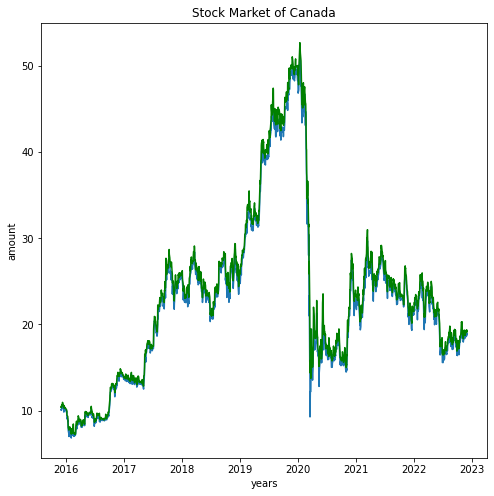

In [47]:
fig = plt.figure(figsize=(8,8))

plt.plot(stock_df['date'],stock_df['usa_low'])
plt.plot(stock_df['date'],stock_df['usa_high'], 'g-')

plt.title('Stock Market of USA')
plt.xlabel('years')
plt.ylabel('amount')
plt.show()

### Canada Stock market analysis

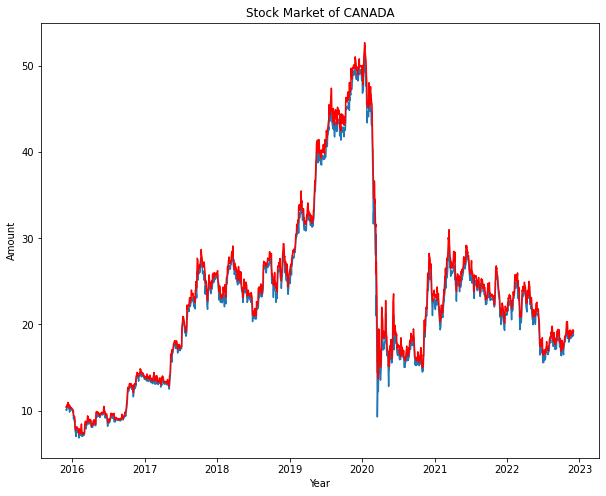

In [44]:
fig = plt.figure(figsize=(10,8))

plt.plot(stock_df["date"], stock_df["cnd_low"])
plt.plot(stock_df["date"], stock_df["cnd_high"],'r-')

plt.title("Stock Market of CANADA")
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

As we can see, the number of confirmed cases is growing, and the death has had no effect on the Canadian stock market. This market is expected to continue growing until the end of 2023, when it will begin to decline.

### Ploting Death ratio of USA and CANADA

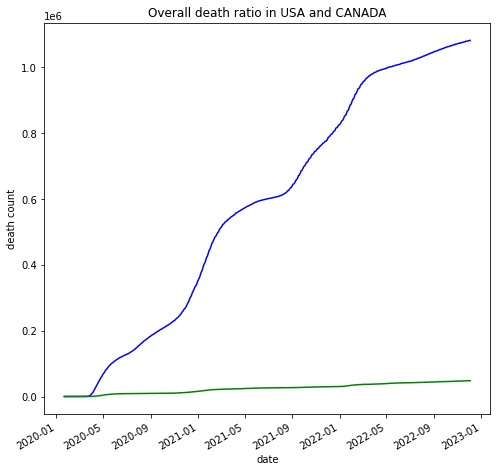

In [48]:
fig = plt.figure(figsize=(8,8))

plt.plot_date(final_df['date'], final_df['usa_total_death'], 'b-')
plt.plot_date(final_df['date'], final_df['cnd_total_death'], 'g-')
plt.title('Overall death ratio in USA and CANADA')
plt.xlabel('date')
plt.ylabel('death count')

fig.autofmt_xdate()
plt.show()



*   As time went from 2020 to 2023, Canadian death rate were gradually increased with minimal death numbers.
*   Compared to Canada, the death rate in USA were exponentially raised during the same timeline.



### Ploting Confirm case of USA and CANADA

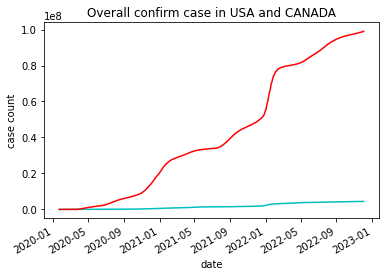

In [65]:
fig = plt.figure()

plt.plot_date(final_df['date'], final_df['cnd_positive_cases'], 'c-')
plt.plot_date(final_df['date'], final_df['usa_positive_cases'], 'r-')
plt.title('Overall confirm case in USA and CANADA')
plt.xlabel('date')
plt.ylabel('case count')

fig.autofmt_xdate()
plt.show()